In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set_style('darkgrid')

import os
import random
import keras
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPool2D,AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D , GlobalAveragePooling2D, Dropout

from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model, load_model

import warnings
warnings.filterwarnings('ignore')

from keras.utils.data_utils import get_file
plt.rcParams["figure.figsize"] = (20,15)


In [2]:
c = 'D:/electro pi  scolership/task4/COVID-19_Radiography_Dataset/COVID'
n = 'D:/electro pi  scolership/task4/COVID-19_Radiography_Dataset/Normal'
p = 'D:/electro pi  scolership/task4/COVID-19_Radiography_Dataset/Viral Pneumonia' 


In [3]:
random.seed(42)
filenames = os.listdir(c) + random.choices(os.listdir(n), k=500) + os.listdir(p)

Classes

0 -> Normal

1 -> Viral Pneumonia

2 -> COVID

In [4]:
categories = []
for filename in filenames:
    category = filename.split('-')[0]
    if category == 'COVID':
        categories.append(str(2))
    elif category == 'Viral Pneumonia':
        categories.append(str(1))
    else:
        categories.append(str(0))

In [5]:
for i in range(len(filenames)):
    if 'COVID' in filenames[i]:
        filenames[i] = os.path.join(c, filenames[i])
    elif 'Viral Pneumonia' in filenames[i]:
        filenames[i] = os.path.join(p, filenames[i])
    else:
        filenames[i] = os.path.join(n, filenames[i])
    
    
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [6]:
df.head()

filename category
0  D:/electro pi  scolership/task4/COVID-19_Radio...        0
1  D:/electro pi  scolership/task4/COVID-19_Radio...        0
2  D:/electro pi  scolership/task4/COVID-19_Radio...        0
3  D:/electro pi  scolership/task4/COVID-19_Radio...        0
4  D:/electro pi  scolership/task4/COVID-19_Radio...        0

In [7]:
df.shape

(504, 2)

In [8]:
img = cv2.imread( 'D:/electro pi  scolership/task4/COVID-19_Radiography_Dataset/Normal/images/Normal-2.png' )

In [9]:
img.shape

(299, 299, 3)

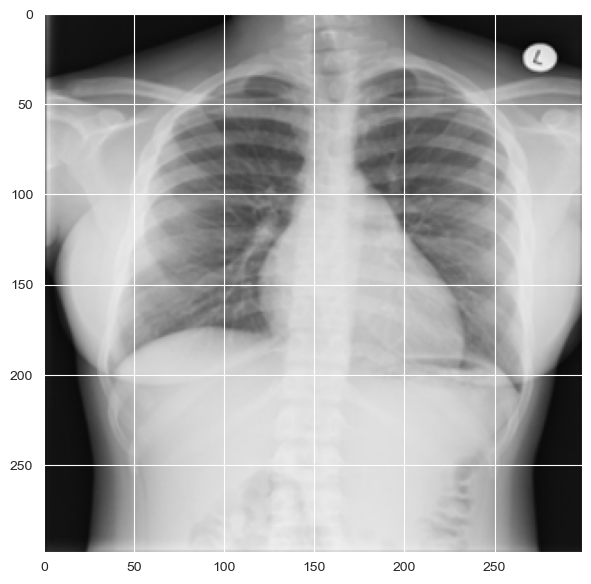

In [10]:
plt.figure(figsize=(15,7))
plt.imshow(img)

In [11]:
img[:,:,2].flatten().shape

(89401,)

Text(50, 0.016, 'because of the blake frame of the image')

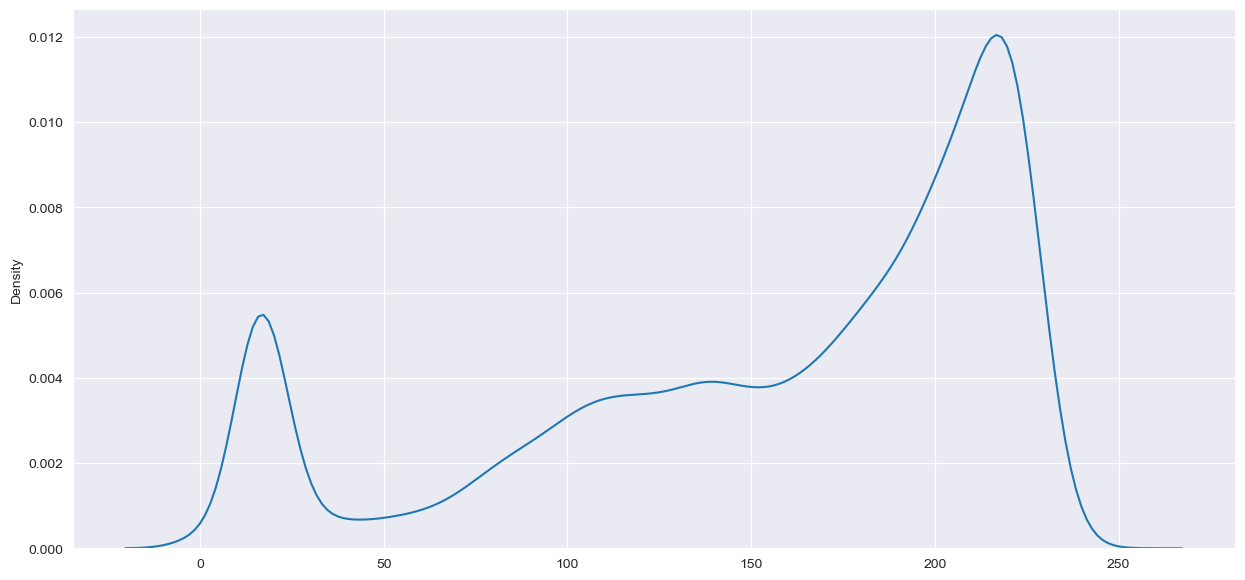

In [12]:
plt.figure(figsize=(15,7))
sns.kdeplot(img[:,:,2].flatten())
plt.annotate('because of the blake frame of the image', xy=(1, 0.015), xytext=(50, 0.016),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

In [13]:
normal_path  = 'D:/electro pi  scolership/task4/COVID-19_Radiography_Dataset/Normal/images/'
len(os.listdir(normal_path))

10192

# Image pre-processing

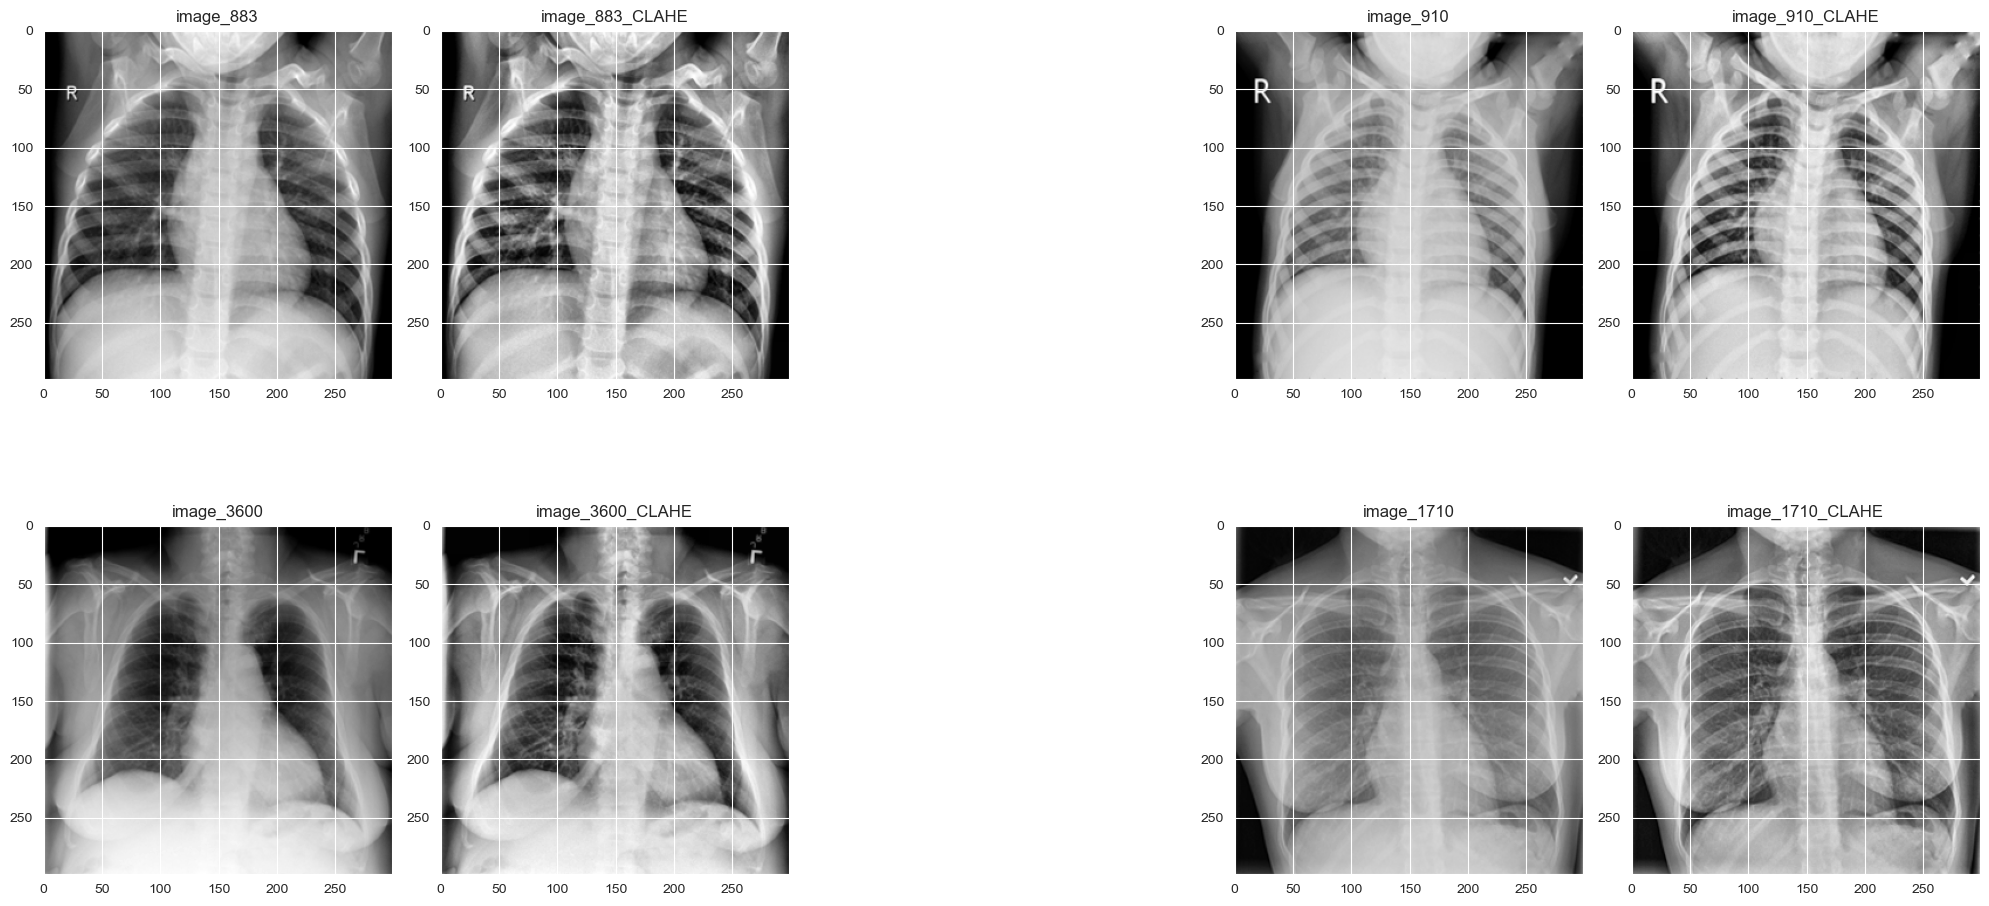

In [14]:
np.random.seed = 42
size = 4
high = len(os.listdir(normal_path))
rand_index = np.random.randint(low = 0 ,high = high,size = size)
i = 1
for index in rand_index:
    img_path = os.path.join(normal_path,f'Normal-{index}.png')
    image = img1 = cv2.imread(img_path)
    
    
    ax = plt.subplot(3,5,i)
    ax.imshow(image[:,:,0] , cmap='gray')
    plt.title(f'image_{index}')
    i+=1
    
    ax = plt.subplot(3,5,i)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    final_img = clahe.apply(image[:,:,0] )
    plt.title(f'image_{index}_CLAHE')
    plt.imshow(final_img , cmap='gray')
    i+=1
    if (i==3 or i==8):
        i+=1
    plt.tight_layout()

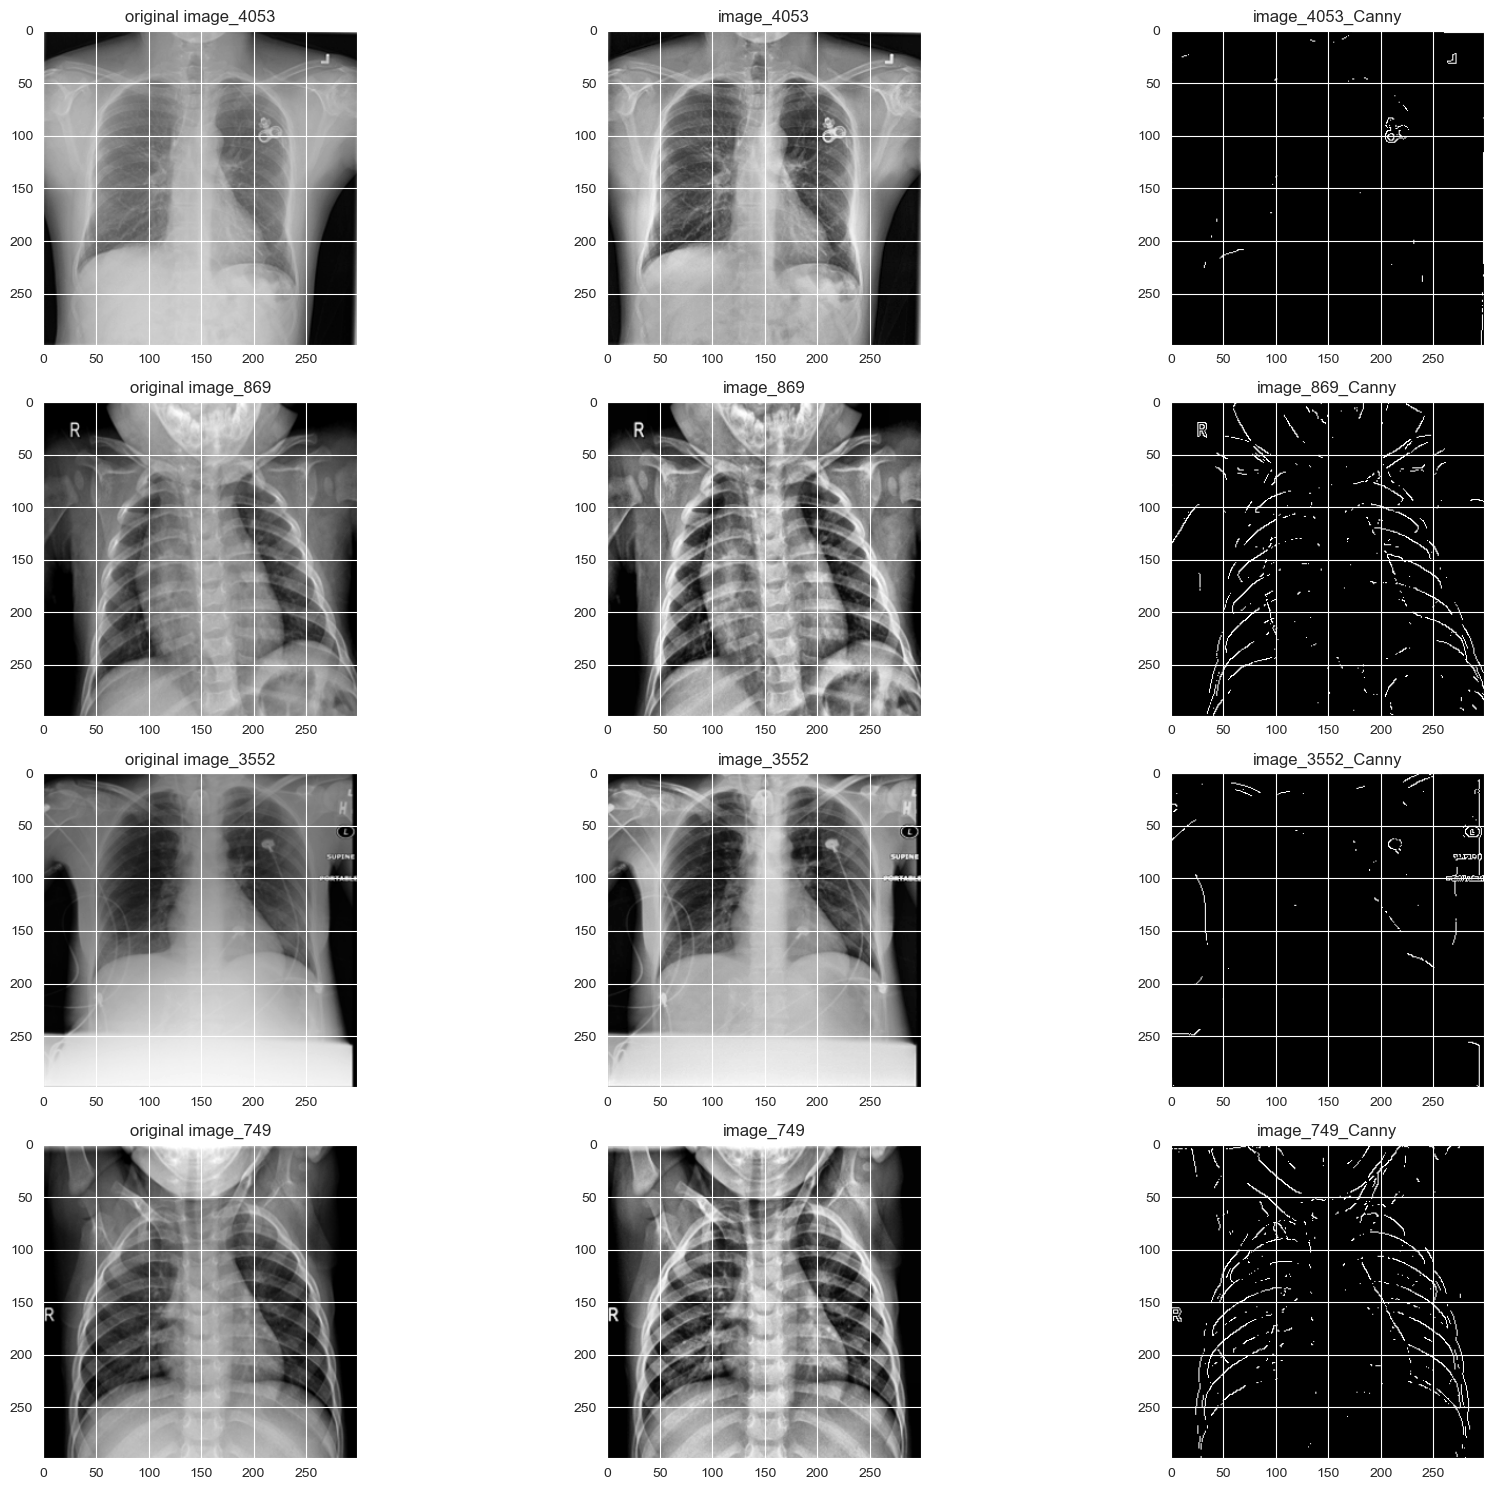

In [15]:
np.random.seed = 42
size = 4
high = len(os.listdir(normal_path))
rand_index = np.random.randint(low = 0 ,high = high,size = size)
i = 1
for index in rand_index:
    img_path = os.path.join(normal_path,f'Normal-{index}.png')
    image = img1 = cv2.imread(img_path)
    
    
    ax = plt.subplot(4,3,i)
    ax.imshow(image[:,:,0] , cmap='gray')
    plt.title(f'original image_{index}')
    i+=1
    
    ax = plt.subplot(4,3,i)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    final_img = clahe.apply(image[:,:,0] )
    plt.title(f'image_{index}')
    plt.imshow(final_img , cmap='gray')
    i+=1
    
    ax = plt.subplot(4,3,i)
    m,n = final_img.shape
    edges = cv2.Canny(final_img,m,n)
    plt.title(f'image_{index}_Canny')
    plt.imshow(edges , cmap='gray')
    i+=1
    
    plt.tight_layout()

# Using LUT

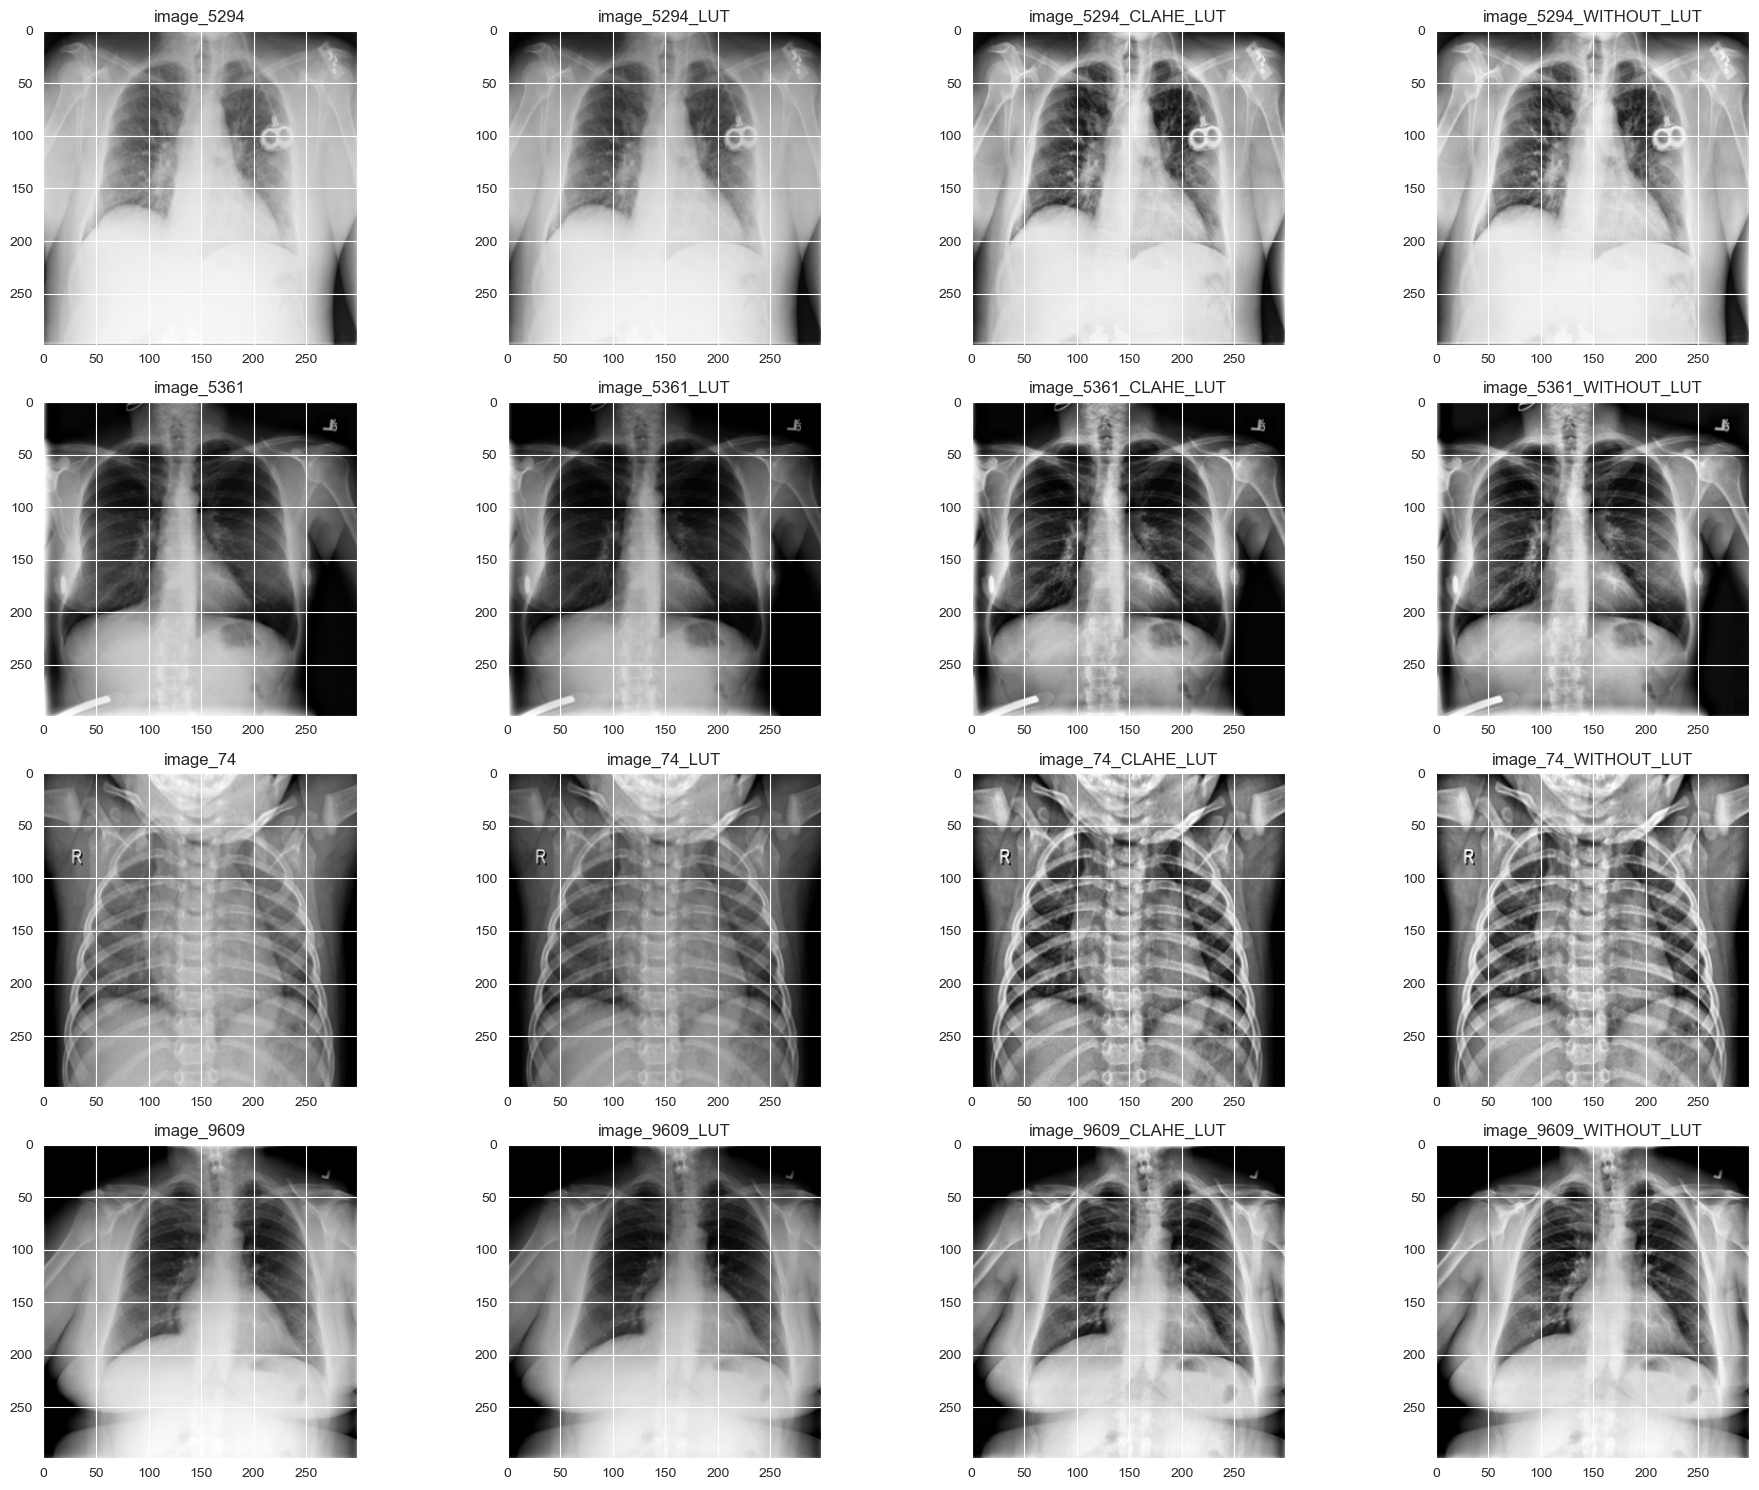

In [16]:
np.random.seed = 40
size = 4
high = len(os.listdir(normal_path))
rand_index = np.random.randint(low = 0 ,high = high,size = size)
i = 1
gamma =1.3
lookUpTable = np.empty((1,256), np.uint8)
for j in range(256):
    lookUpTable[0,j] = np.clip(pow(j / 255.0, gamma) * 255.0, 0, 255)
    
for index in rand_index:
    img_path = os.path.join(normal_path,f'Normal-{index}.png')
    image  = cv2.imread(img_path)
    
    
    ax = plt.subplot(4,4,i)
    ax.imshow(image[:,:,0] , cmap='gray')
    plt.title(f'image_{index}')
    i+=1
    
    for j in range(256):
        lookUpTable[0,j] = np.clip(pow(j / 255.0, gamma) * 255.0, 0, 255)
        
    ax = plt.subplot(4,4,i)
    lut = cv2.LUT(image, lookUpTable)
    plt.title(f'image_{index}_LUT')
    plt.imshow(lut , cmap='gray')
    i+=1
    
    
    ax = plt.subplot(4,4,i)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    final_img = clahe.apply(lut[:,:,0] )
    plt.title(f'image_{index}_CLAHE_LUT')
    plt.imshow(final_img , cmap='gray')
    i+=1
    
    ax = plt.subplot(4,4,i)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    final_img = clahe.apply(image[:,:,0] )
    plt.title(f'image_{index}_WITHOUT_LUT')
    plt.imshow(final_img , cmap='gray')
    i+=1
    
    
    
    plt.tight_layout()


# GaussianBlur

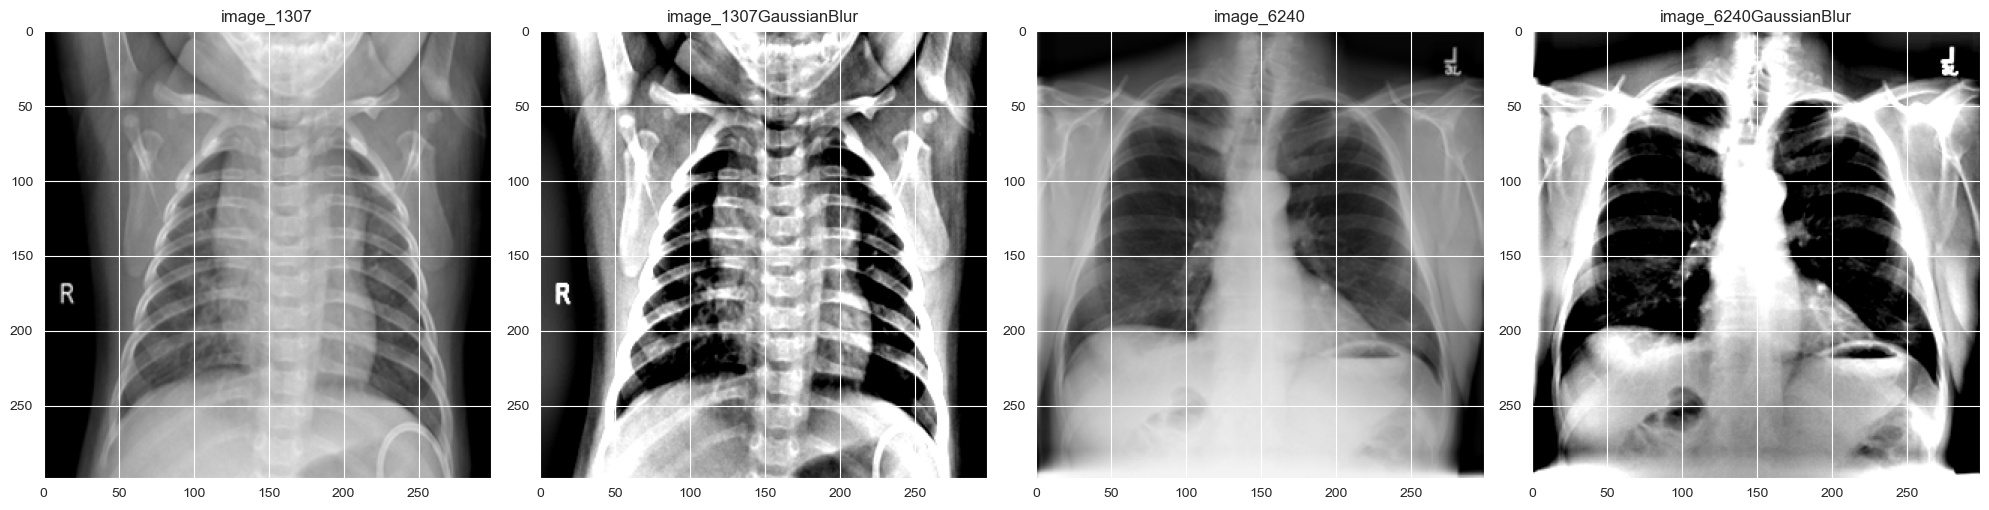

In [17]:
sizee = 5
i = 1
rand_index = np.random.randint(low = 0 ,high = high,size = size)
for index in rand_index:
    img_path = os.path.join(normal_path,f'Normal-{index}.png')
    image  = cv2.imread(img_path)
    ax = plt.subplot(2,4,i)
    ax.imshow(image[:,:,0] , cmap='gray')
    plt.title(f'image_{index}')
    i+=1
    
    ax = plt.subplot(2,4,i)
    image = cv2.addWeighted (image, 4, cv2.GaussianBlur(image, (0,0), 256/10), -4, 128) 
    plt.title(f'image_{index}GaussianBlur')
    plt.imshow(image , cmap='gray')
    i+=1
    
    plt.tight_layout()

In [18]:
directory = 'D:/electro pi  scolership/task4/COVID-19_Radiography_Dataset'

for (root,dirs,files) in os.walk(directory, topdown=True):
        print (dirs)

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
['images', 'masks']
[]
[]
['images', 'masks']
[]
[]
['images', 'masks']
[]
[]
['images', 'masks']
[]
[]


loading data

In [19]:
directory = 'D:/electro pi  scolership/task4/COVID-19_Radiography_Dataset'


train_data =  tf.keras.preprocessing.image_dataset_from_directory(
    directory = directory,
    labels="inferred",
    label_mode="int",
    class_names=['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'],
    color_mode="grayscale",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = directory,
    labels="inferred",
    label_mode="int",
    class_names=['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'],
    color_mode="grayscale",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 42330 files belonging to 4 classes.
Using 33864 files for training.
Found 42330 files belonging to 4 classes.
Using 8466 files for validation.


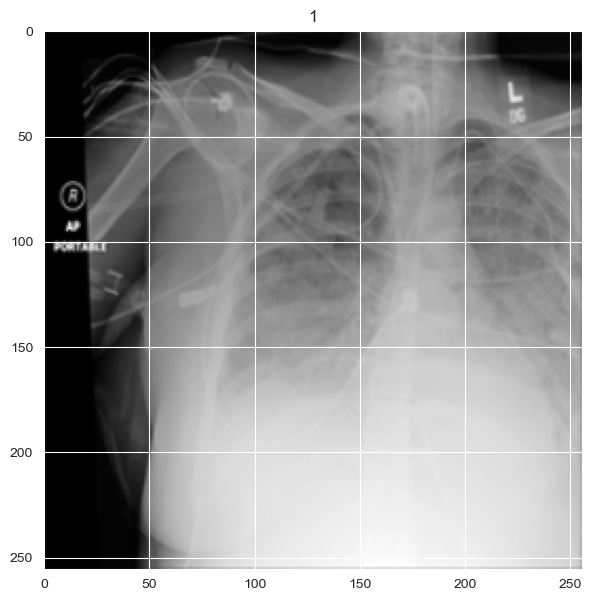

In [20]:
plt.figure(figsize=(15,7))
for ele in train_data:
    img = ele[0][11]
    title = ele[1][11].numpy() # matplot is compatable with numpy but not with tensor so we should convert tensor to numpy 
    plt.imshow(img , cmap='gray')
    plt.title(title)
    
    break

In [21]:
#clean the data from damaged images
def detect_dameged_images(dataset : tf.data.Dataset)-> np.array : 
    images_list = []
    images_labels = []
    for element in dataset.unbatch():
        image = element[0].numpy() # first dim represent the image and second dim represent the label
        label = element[1].numpy()
        median = np.median(image)
        if median < 50 or median > 180:
            images_list.append(image)
            images_labels.append(label)
    return images_list , images_labels

# Train dataset 

In [22]:
images_list = []
images_labels = []
images_list , images_labels = detect_dameged_images(train_data)
len(images_labels)

18378

In [23]:
images_list_val , images_labels_val = detect_dameged_images(val_data)
len(images_labels_val)

4472

In [24]:
def vis_images(images_list :np.array , size , random = True , title = None):
    '''
        plot sample of images list 
            - the sample can be random or not depend on the parameter `random`
        our plot will has 4 column and number of rows will be defined based on the size which represent number of images we want to plot
    '''
    plt.title(title)
    rows = (size//4) 
    if random == True:
        high = len(images_list)
        rand_index = np.random.randint(low = 0 ,high = high,size = size)
    for i in range(0,size):
        
        plt.subplot(rows,4,i+1)
        if random == True : 
            index = rand_index[i]
        else :
            index = i
        
        median = int(np.median(images_list[index]))
        plt.title(f'median is`{median}` and index is `{index}`')
        
        plt.imshow(images_list[index] , cmap='gray') 

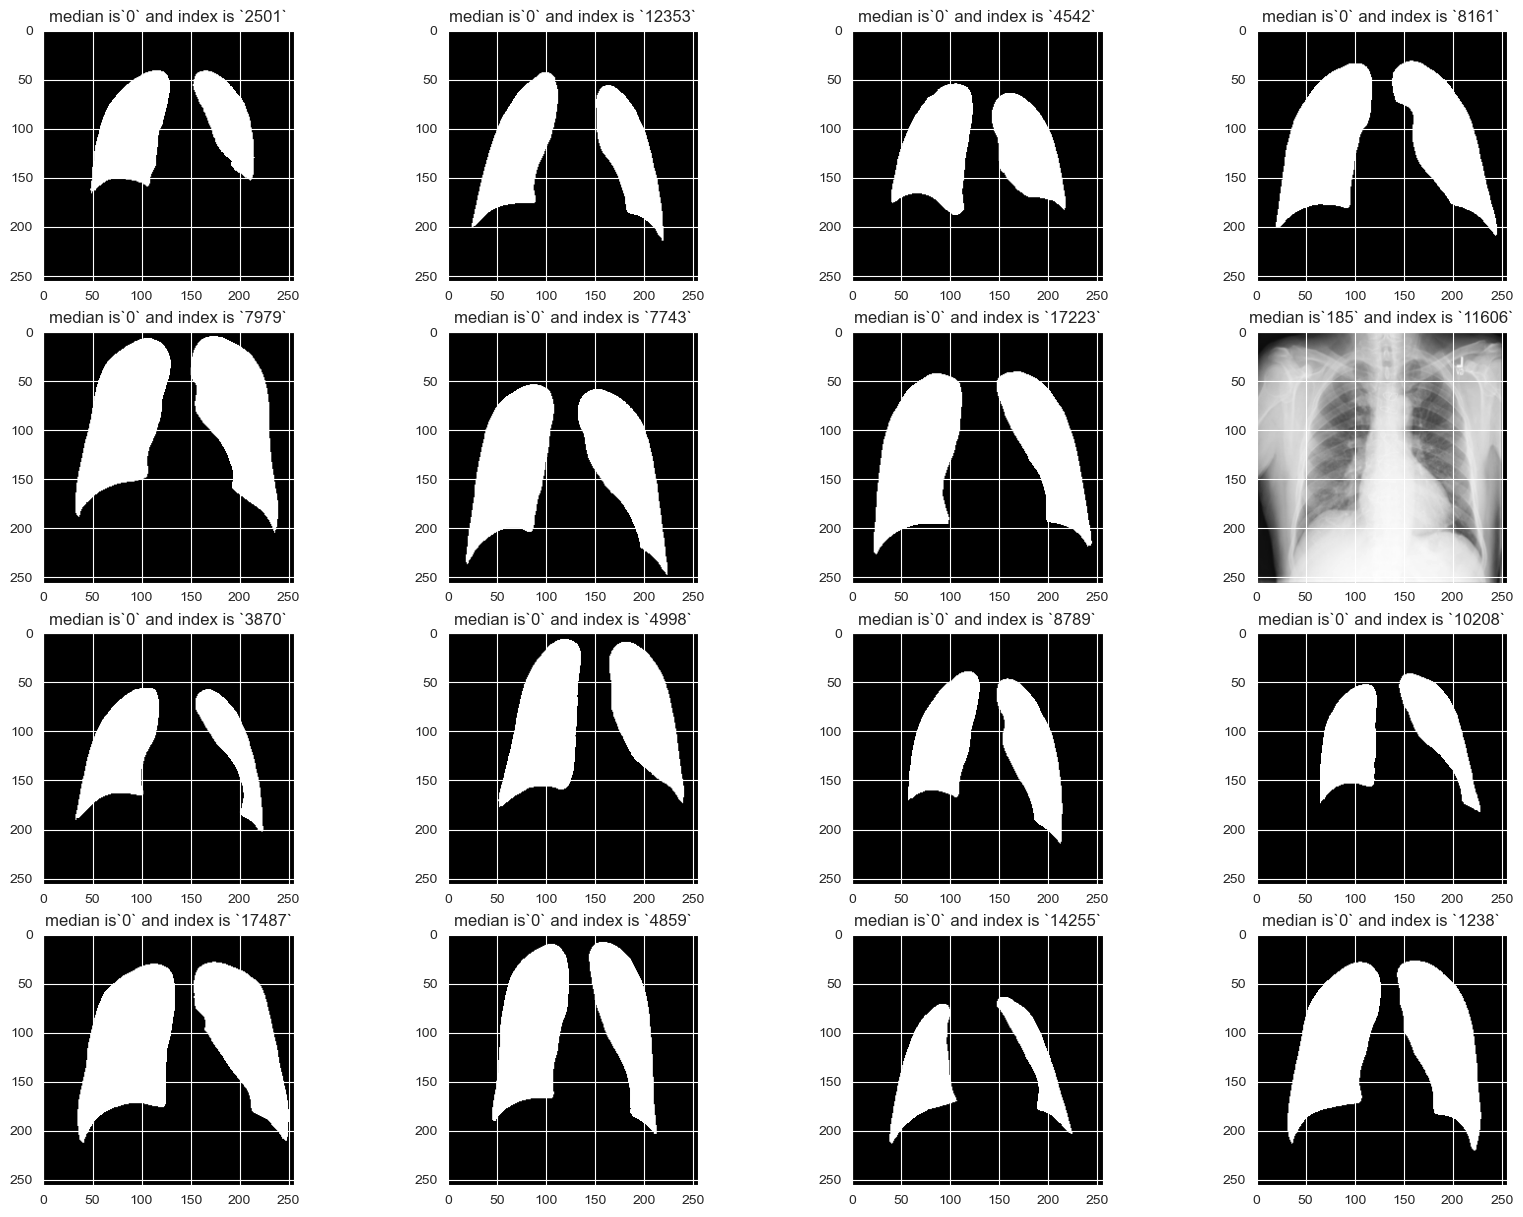

In [25]:
vis_images(images_list , 16)

In [26]:
dameged_path_train = 'D:/electro pi  scolership/task4/COVID-19_Radiography_Dataset/dameged_data_train'
if (os.path.exists(dameged_path_train)) == False :
    os.makedirs(dameged_path_train)
    for i in range(len(images_list)):
        path = os.path.join(dameged_path_train,f'image_{i}.png')
        cv2.imwrite(path, images_list[i])
else :
    print("dameged data already in the path")

In [27]:
dameged_path_val = 'D:/electro pi  scolership/task4/COVID-19_Radiography_Dataset/dameged_data_val'
if (os.path.exists(dameged_path_val)) == False :
    os.makedirs(dameged_path_val)
    for i in range(len(images_list_val)):
        path = os.path.join(dameged_path_val,f'image_{i}.png')
        cv2.imwrite(path, images_list_val[i])
else :
    print("dameged data val already in the path")

In [28]:
index  = [0 , 1 , 2 , 9 , 13 , 14 , 85 , 131 , 3 , 21 , 45 , 73 , 107  , 159 , 188 , 233] 
dameged_images = []
for i in index:
    path = os.path.join(dameged_path_train, f'image_{i}.png')
    img = cv2.imread(path)
    dameged_images.append(img)

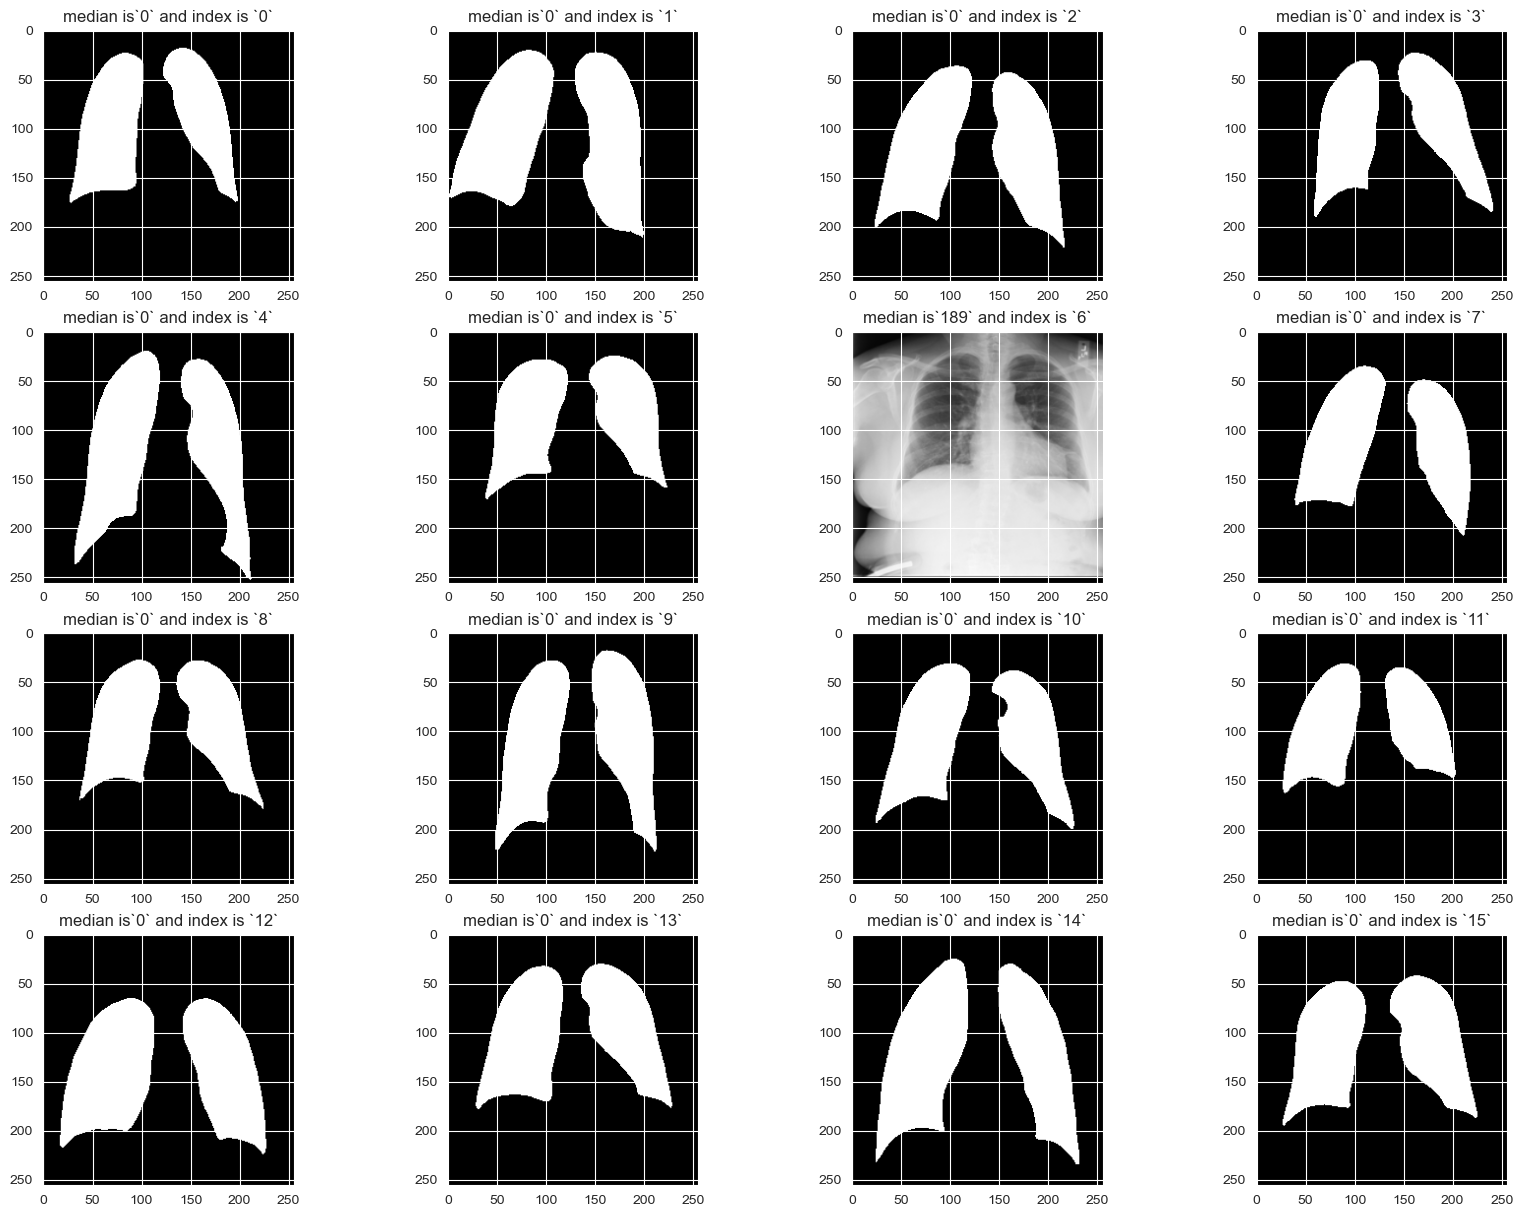

In [29]:
vis_images(dameged_images , 16 , random=False)

In [30]:
index  = [12 , 13 ,47  , 95 , 6 , 26 , 53 , 150] 
dameged_images_val = []
for i in index:
    path = os.path.join(dameged_path_val, f'image_{i}.png')
    img = cv2.imread(path)
    dameged_images_val.append(img)

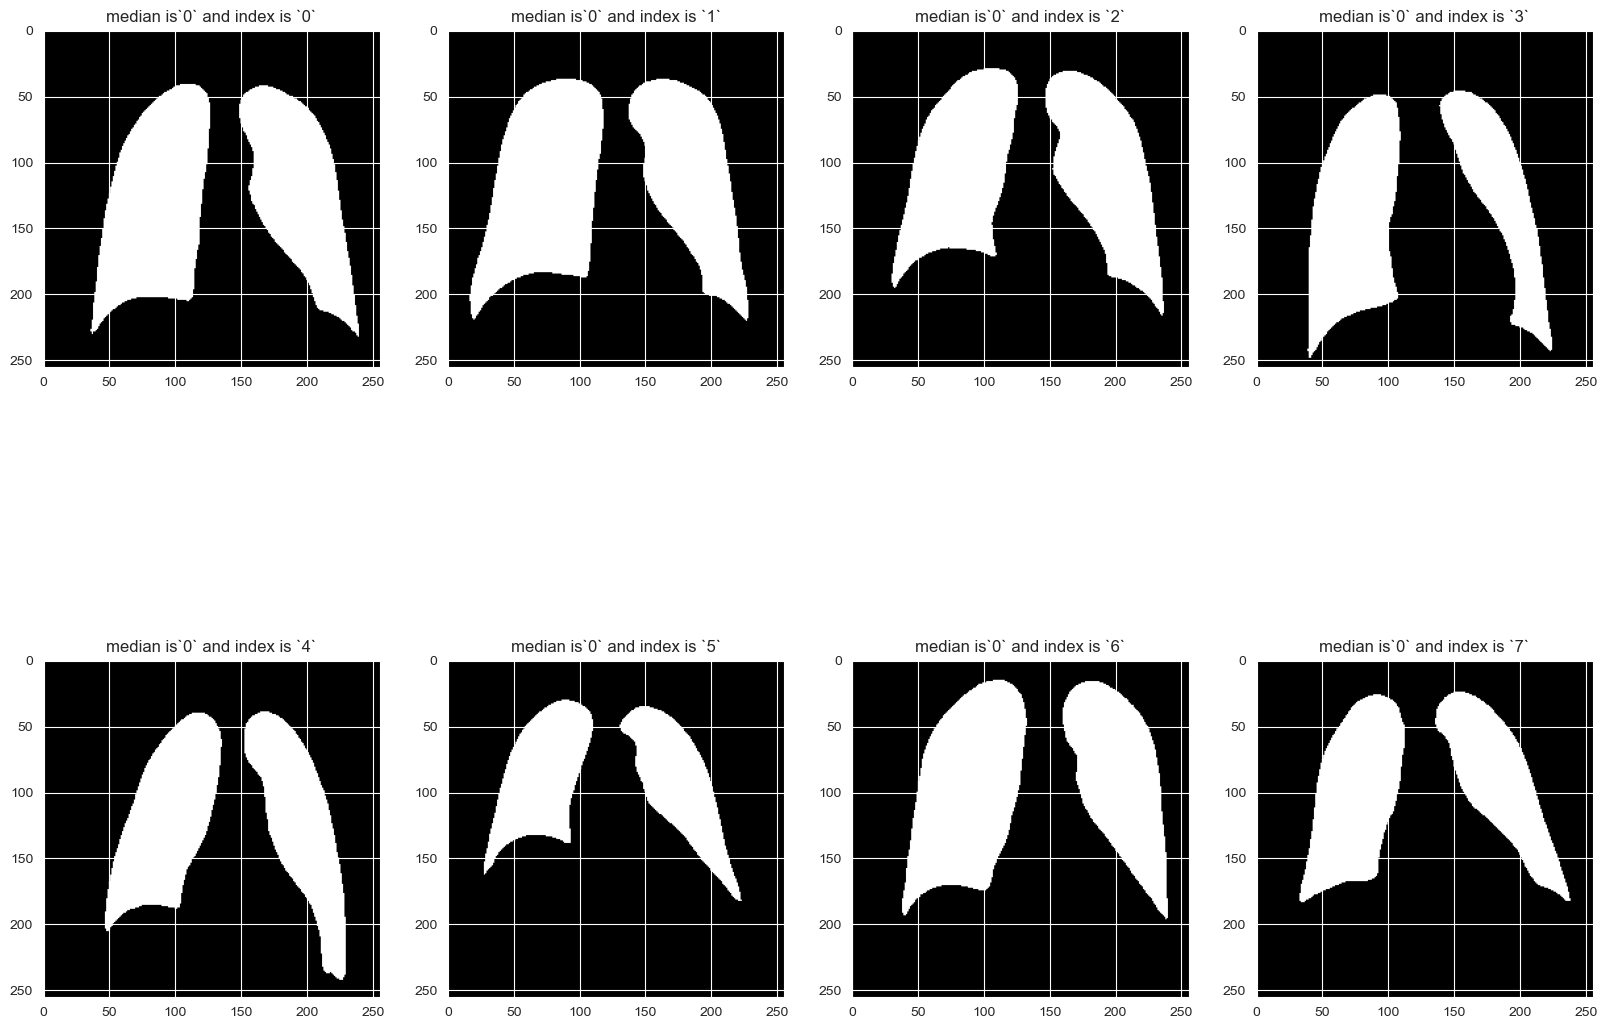

In [31]:
vis_images(dameged_images_val , 8 , random=False)

tf.Tensor(0, shape=(), dtype=int32)
92.97809


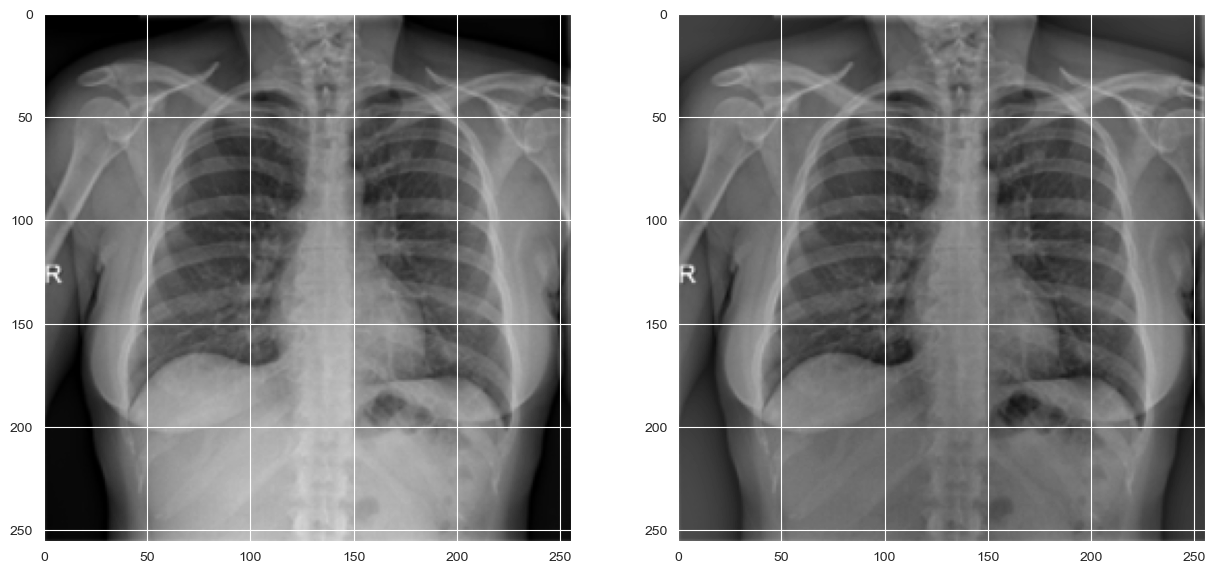

In [32]:
plt.figure(figsize=(15,7))
for image , label in train_data.unbatch():
    print(label)
    plt.subplot(1,2,1)
    img  = image.numpy()
    m = np.median(img)
    print(m)
    plt.imshow(img , cmap='gray')
    plt.subplot(1,2,2)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 256/10), -4, 128)
    plt.imshow(img , cmap='gray')
    break

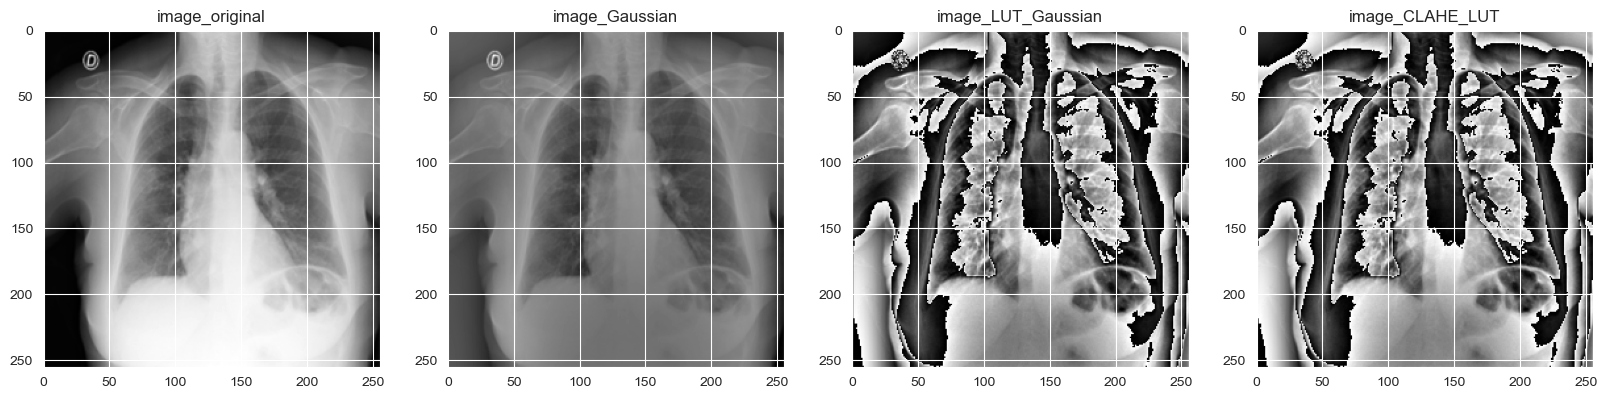

In [33]:
gamma =1.3
lookUpTable = np.empty((1,256), np.uint8)
for j in range(256):
    lookUpTable[0,j] = np.clip(pow(j / 255.0, gamma) * 255.0, 0, 255)
    
for image , label in train_data.unbatch():
    plt.subplot(1,4,1)
    img  = image.numpy()
    plt.imshow(img , cmap='gray')
    plt.title(f'image_original')
    

    plt.subplot(1,4,2)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 256/10), -4, 128)
    plt.imshow(img , cmap='gray')
    plt.title(f'image_Gaussian')
    
    #img_ = np.dstack([img, img, img]) ## to change image form 1D to 3D but i will not use it
    img = img.astype(np.uint8) # lut will throw an error if the datatype was not uint8 so i should convert the type

    plt.subplot(1,4,3)
    lut = cv2.LUT(img, lookUpTable)
    plt.title('image_LUT_Gaussian')
    plt.imshow(lut , cmap='gray')
    
    plt.subplot(1,4,4)
    clahe = cv2.createCLAHE(clipLimit=0.5, tileGridSize=(1,1))
    final_img = clahe.apply(lut)
    plt.title(f'image_CLAHE_LUT')
    plt.imshow(final_img , cmap='gray')
    
    break        

In [34]:
def dataset_to_numpy_util(dataset):
    '''
     this function is to convert my dataset to numpy array because i will need this for  visualization 
    '''
    
    ds_images, ds_labels = [], []
    for images, labels in dataset.unbatch():
        ds_images.append(images.numpy())
        ds_labels.append(labels.numpy())
    
    return (np.array(ds_images), np.array(ds_labels))

In [35]:
def preprocessing(dataset :tf.data.Dataset) ->list:
    images = []
    labels = []
    gamma =1.3
    lookUpTable = np.empty((1,256), np.uint8) 
    
    for image , label in dataset.unbatch() :
        image = tf.cast(image , tf.uint8)
        image = image.numpy()
        
        ##  step 1 - get rid of black frame ##
        image = image.reshape(image.shape[0], image.shape[1] , 1)
        
        median = np.median(image)
        
        ##  step 2 - filter images based on their median ##
        if median < 50 or median > 180:
            pass
        else :
            for j in range(256):
                lookUpTable[0,j] = np.clip(pow(j / 255.0, gamma) * 255.0, 0, 255)
        
        #  step 3 - apply LUT ##    
            lut = cv2.LUT(image, lookUpTable)

        #  step 4 - apply CLAHE ##
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
            final_img = clahe.apply(lut)
            
            
            images.append(final_img)
            labels.append(label) 
            
    return images , labels

In [36]:
train_images , train_labels = preprocessing(train_data)


In [37]:
print(len(train_images))
print(len(train_labels))


15594
15594


In [38]:
val_images , val_labels = preprocessing(val_data)


In [39]:
print(len(val_images))
print(len(val_labels))

4022
4022


Cleaned Data

In [40]:
folders = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
train_clean_dir = 'D:\\electro pi  scolership\\task4\\COVID-19_Radiography_Dataset\\cleaned_data_train'
val_clean_dir = 'D:\\electro pi  scolership\\task4\\COVID-19_Radiography_Dataset\\cleaned_data_val'

In [41]:
def save_data(images , labels , cleaned_path ):
    for folder in folders:
        path = os.path.join(cleaned_path,folder)
        if os.path.isdir(path):
            pass
        else :
            os.makedirs(path)
    
    c_count = 0
    l_count = 0
    n_count = 0
    v_count = 0
    
    if len(os.listdir(os.path.join(cleaned_path , folders[0])))==0: # is empty
        for img , label in zip(images,labels):
            label = label.numpy()
            # img *= 255 # [0, 255] range
            if label ==0:
                c_count +=1
                file_name = os.path.join(cleaned_path , folders[label],f'{folders[label]}_{c_count}.png')
                cv2.imwrite(file_name , img)
            
            elif label ==1:
                l_count +=1
                file_name = os.path.join(cleaned_path , folders[label],f'{folders[label]}_{l_count}.png')
                cv2.imwrite(file_name , img)
                
            elif label ==2:
                n_count +=1
                file_name = os.path.join(cleaned_path , folders[label],f'{folders[label]}_{n_count}.png')
                cv2.imwrite(file_name , img)
                
            elif label ==3:
                v_count +=1
                file_name = os.path.join(cleaned_path , folders[label],f'{folders[label]}_{v_count}.png')
                cv2.imwrite(file_name , img)

In [42]:
save_data(train_images , train_labels , train_clean_dir)

In [43]:
save_data(val_images , val_labels , val_clean_dir)

In [44]:
train_directory = 'D:\\electro pi  scolership\\task4\\COVID-19_Radiography_Dataset\\cleaned_data_train'

val_directory = 'D:\\electro pi  scolership\\task4\\COVID-19_Radiography_Dataset\\cleaned_data_val'

train_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    directory = train_directory,
    labels="inferred",
    label_mode="int",
    class_names = None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256), # remeber that some images were croped
    shuffle=True,
    seed=42,
    interpolation="bilinear",
    follow_links=False,
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = val_directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    interpolation="bilinear",
    follow_links=False,
)

Found 15594 files belonging to 4 classes.
Found 4022 files belonging to 4 classes.


In [45]:
def normalize(image , label):
    image = image / 255.
    return image , label 

In [46]:
train_dataset = train_dataset.map(normalize, num_parallel_calls=16)
train_dataset = train_dataset.shuffle(buffer_size = 512, reshuffle_each_iteration=True) 
train_dataset = train_dataset.repeat() 
train_dataset = train_dataset.prefetch(-1) # AUTOTUNE	-1 so here we use AUTOTUNE
val_dataset = val_dataset.map(normalize, num_parallel_calls=16)
val_dataset = val_dataset.repeat()

Modeling

# VIT

In [48]:
import tensorflow_addons as tfa
learning_rate = 0.001
weight_decay = 0.0001
classes = 4
batch_size = 32
num_epochs = 50
image_size = 256  # We'll resize input images to this size
patch_size = 6  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [49]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [50]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 256 X 256
Patch size: 6 X 6
Patches per image: 1764
Elements per patch: 108


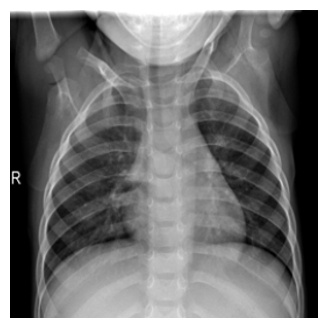

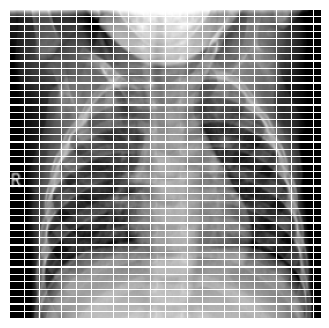

In [51]:
plt.figure(figsize=(4, 4))
image = img1
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(256, 256)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [52]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [53]:
def create_vit_classifier(input_tensor=None, 
                          input_shape=None,
                            classes=1000):
    
    
    if input_shape == None and input_tensor == None:
        raise ValueError('should enter atleast the shape of the input')
        
    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
            img_input = Input(tensor=input_tensor)
            
        
    # Create patches.
    patches = Patches(patch_size)(img_input)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(classes)(features)
    # Create the Keras model.
    model = tf.keras.Model(inputs=img_input, outputs=logits)
    return model

In [54]:
vit_classifier = create_vit_classifier(input_shape=(256,256,3) , classes=4)

In [55]:
vit_classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 patches_1 (Patches)            (None, None, 108)    0           ['input_1[0][0]']                
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 1764, 64)     119872      ['patches_1[0][0]']              
                                                                                                  
 layer_normalization (LayerNorm  (None, 1764, 64)    128         ['patch_encoder[0][0]']      

 eadAttention)                                                    'layer_normalization_6[0][0]']  
                                                                                                  
 add_6 (Add)                    (None, 1764, 64)     0           ['multi_head_attention_3[0][0]', 
                                                                  'add_5[0][0]']                  
                                                                                                  
 layer_normalization_7 (LayerNo  (None, 1764, 64)    128         ['add_6[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 dense_7 (Dense)                (None, 1764, 128)    8320        ['layer_normalization_7[0][0]']  
                                                                                                  
 dropout_6

 dropout_13 (Dropout)           (None, 1764, 64)     0           ['dense_14[0][0]']               
                                                                                                  
 add_13 (Add)                   (None, 1764, 64)     0           ['dropout_13[0][0]',             
                                                                  'add_12[0][0]']                 
                                                                                                  
 layer_normalization_14 (LayerN  (None, 1764, 64)    128         ['add_13[0][0]']                 
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_7 (MultiH  (None, 1764, 64)    66368       ['layer_normalization_14[0][0]', 
 eadAttention)                                                    'layer_normalization_14[0][0]'] 
          

# Swin

In [60]:
from keras_cv_attention_models import swin_transformer_v2
swin_model = swin_transformer_v2.SwinTransformerV2Tiny_window8(input_shape = (256,256,3))

114491128/114491128 [==============================] - 33s 0us/step
>>>> Load pretrained from: C:\Users\lenovo\.keras\models\swin_transformer_v2_tiny_window8_256_imagenet.h5


In [61]:
for layer in swin_model.layers :
  layer.trainable = False

In [62]:
last_layer = swin_model.get_layer(swin_model.layers[-2].name) # last layer will be dense with 1000 units so i want the layer before that 
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

last layer output shape:  (None, 768)
KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [63]:
x = Flatten()(last_output) 

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

swin_model = Model(swin_model.input, x)

In [64]:
swin_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 64, 64, 96)   4704        ['input_2[0][0]']                
                                                                                                  
 stem_ln (LayerNormalization)   (None, 64, 64, 96)   192         ['stem_conv[0][0]']              
                                                                                                  
 tf.reshape (TFOpLambda)        (None, 8, 8, 768)    0           ['stem_ln[0][0]']          

 da)                                                             , 'tf.expand_dims[0][0]']        
                                                                                                  
 tf.reshape_5 (TFOpLambda)      (None, 64, 3, 32)    0           ['stack1_block1_attn_value_bias[0
                                                                 ][0]']                           
                                                                                                  
 stack1_block1_attn_attention_s  (None, 3, 64, 64)   0           ['tf.__operators__.add[0][0]']   
 cores (Softmax)                                                                                  
                                                                                                  
 tf.compat.v1.transpose_3 (TFOp  (None, 3, 64, 32)   0           ['tf.reshape_5[0][0]']           
 Lambda)                                                                                          
          

                                                                                                  
 stack1_block2_attn_qkv (Dense)  (None, 8, 8, 288)   27648       ['tf.reshape_10[0][0]']          
                                                                                                  
 stack1_block2_attn_pos_emb (Pa  ((225, 2),          0           ['tf.reshape_10[0][0]']          
 irWiseRelativePositionalEmbedd   (64, 64))                                                       
 ing)                                                                                             
                                                                                                  
 tf.reshape_11 (TFOpLambda)     (None, 64, 288)      0           ['stack1_block2_attn_qkv[0][0]'] 
                                                                                                  
 stack1_block2_attn_meta_dense_  (225, 512)          1536        ['stack1_block2_attn_pos_emb[0][0
 1 (Dense)

 )                                                               ores[0][0]',                     
                                                                  'tf.compat.v1.transpose_10[0][0]
                                                                 ']                               
                                                                                                  
 tf.compat.v1.transpose_12 (TFO  (None, 64, 3, 32)   0           ['tf.linalg.matmul_3[0][0]']     
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_15 (TFOpLambda)     (None, 8, 8, 96)     0           ['tf.compat.v1.transpose_12[0][0]
                                                                 ']                               
                                                                                                  
 stack1_bl

                                                                                                  
 tf.reshape_21 (TFOpLambda)     (None, 8, 8, 192)    0           ['tf.compat.v1.transpose_15[0][0]
                                                                 ']                               
                                                                                                  
 stack2_block1_attn_qkv (Dense)  (None, 8, 8, 576)   110592      ['tf.reshape_21[0][0]']          
                                                                                                  
 stack2_block1_attn_pos_emb (Pa  ((225, 2),          0           ['tf.reshape_21[0][0]']          
 irWiseRelativePositionalEmbedd   (64, 64))                                                       
 ing)                                                                                             
                                                                                                  
 tf.reshap

 )                                                               ores[0][0]',                     
                                                                  'tf.compat.v1.transpose_18[0][0]
                                                                 ']                               
                                                                                                  
 tf.compat.v1.transpose_20 (TFO  (None, 64, 6, 32)   0           ['tf.linalg.matmul_5[0][0]']     
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_26 (TFOpLambda)     (None, 8, 8, 192)    0           ['tf.compat.v1.transpose_20[0][0]
                                                                 ']                               
                                                                                                  
 stack2_bl

                                                                                                  
 tf.split_3 (TFOpLambda)        [(None, 64, 192),    0           ['tf.reshape_31[0][0]']          
                                 (None, 64, 192),                                                 
                                 (None, 64, 192)]                                                 
                                                                                                  
 activation_3 (Activation)      (225, 512)           0           ['stack2_block2_attn_meta_dense_1
                                                                 [0][0]']                         
                                                                                                  
 stack2_block2_attn_query_bias   (None, 64, 192)     192         ['tf.split_3[0][0]']             
 (BiasLayer)                                                                                      
          

 se)                                                                                              
                                                                                                  
 tf.reshape_36 (TFOpLambda)     (None, 4, 8, 1536)   0           ['stack2_block2_attn_output[0][0]
                                                                 ']                               
                                                                                                  
 tf.compat.v1.transpose_28 (TFO  (None, 8, 4, 1536)  0           ['tf.reshape_36[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_37 (TFOpLambda)     (None, 32, 32, 192)  0           ['tf.compat.v1.transpose_28[0][0]
                                                                 ']                               
          

                                                                                                  
 stack3_block1_attn_meta_dense_  (225, 512)          1536        ['stack3_block1_attn_pos_emb[0][0
 1 (Dense)                                                       ]']                              
                                                                                                  
 tf.split_4 (TFOpLambda)        [(None, 64, 384),    0           ['tf.reshape_42[0][0]']          
                                 (None, 64, 384),                                                 
                                 (None, 64, 384)]                                                 
                                                                                                  
 activation_4 (Activation)      (225, 512)           0           ['stack3_block1_attn_meta_dense_1
                                                                 [0][0]']                         
          

 se)                                                                                              
                                                                                                  
 tf.reshape_47 (TFOpLambda)     (None, 2, 8, 3072)   0           ['stack3_block1_attn_output[0][0]
                                                                 ']                               
                                                                                                  
 tf.compat.v1.transpose_36 (TFO  (None, 8, 2, 3072)  0           ['tf.reshape_47[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_48 (TFOpLambda)     (None, 16, 16, 384)  0           ['tf.compat.v1.transpose_36[0][0]
                                                                 ']                               
          

 stack3_block2_attn_meta_dense_  (225, 12)           6144        ['activation_5[0][0]']           
 2 (Dense)                                                                                        
                                                                                                  
 tf.reshape_52 (TFOpLambda)     (None, 64, 12, 32)   0           ['stack3_block2_attn_query_bias[0
                                                                 ][0]']                           
                                                                                                  
 tf.reshape_53 (TFOpLambda)     (None, 64, 12, 32)   0           ['tf.split_5[0][1]']             
                                                                                                  
 tf.compat.v1.gather_5 (TFOpLam  (64, 64, 12)        0           ['stack3_block2_attn_meta_dense_2
 bda)                                                            [0][0]',                         
          

 tf.__operators__.getitem_20 (S  (None, 4, 16, 384)  0           ['tf.reshape_57[0][0]']          
 licingOpLambda)                                                                                  
                                                                                                  
 tf.__operators__.getitem_21 (S  (None, 12, 16, 384)  0          ['tf.reshape_57[0][0]']          
 licingOpLambda)                                                                                  
                                                                                                  
 tf.concat_10 (TFOpLambda)      (None, 16, 16, 384)  0           ['tf.__operators__.getitem_20[0][
                                                                 0]',                             
                                                                  'tf.__operators__.getitem_21[0][
                                                                 0]']                             
          

                                                                 ]']                              
                                                                                                  
 tf.compat.v1.transpose_45 (TFO  (None, 12, 64, 32)  0           ['tf.reshape_61[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 tf.compat.v1.transpose_46 (TFO  (None, 12, 32, 64)  0           ['tf.reshape_62[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 tf.math.sigmoid_6 (TFOpLambda)  (64, 64, 12)        0           ['tf.compat.v1.gather_6[0][0]']  
                                                                                                  
 tf.math.l

                                                                                                  
 stack3_block3_mlp_ln (LayerNor  (None, 16, 16, 384)  768        ['stack3_block3_mlp_Dense_1[0][0]
 malization)                                                     ']                               
                                                                                                  
 stack3_block3_output (Add)     (None, 16, 16, 384)  0           ['stack3_block3_attn_out[0][0]', 
                                                                  'stack3_block3_mlp_ln[0][0]']   
                                                                                                  
 tf.__operators__.getitem_24 (S  (None, 12, 16, 384)  0          ['stack3_block3_output[0][0]']   
 licingOpLambda)                                                                                  
                                                                                                  
 tf.__oper

 ambda)                                                          ']                               
                                                                                                  
 tf.math.multiply_7 (TFOpLambda  (64, 64, 12)        0           ['tf.math.sigmoid_7[0][0]']      
 )                                                                                                
                                                                                                  
 tf.linalg.matmul_14 (TFOpLambd  (None, 12, 64, 64)  0           ['tf.math.l2_normalize_14[0][0]',
 a)                                                               'tf.math.l2_normalize_15[0][0]']
                                                                                                  
 tf.compat.v1.transpose_55 (TFO  (12, 64, 64)        0           ['tf.math.multiply_7[0][0]']     
 pLambda)                                                                                         
          

 stack3_block4_attn_out (Add)   (None, 16, 16, 384)  0           ['stack3_block3_output[0][0]',   
                                                                  'stack3_block4_attn_ln[0][0]']  
                                                                                                  
 stack3_block4_mlp_Dense_0 (Den  (None, 16, 16, 1536  591360     ['stack3_block4_attn_out[0][0]'] 
 se)                            )                                                                 
                                                                                                  
 stack3_block4_mlp_gelu (Activa  (None, 16, 16, 1536  0          ['stack3_block4_mlp_Dense_0[0][0]
 tion)                          )                                ']                               
                                                                                                  
 stack3_block4_mlp_Dense_1 (Den  (None, 16, 16, 384)  590208     ['stack3_block4_mlp_gelu[0][0]'] 
 se)      

 stack3_block5_attn_scale (ExpL  (None, 12, 64, 64)  12          ['tf.linalg.matmul_16[0][0]']    
 ogitScale)                                                                                       
                                                                                                  
 tf.expand_dims_8 (TFOpLambda)  (1, 12, 64, 64)      0           ['tf.compat.v1.transpose_62[0][0]
                                                                 ']                               
                                                                                                  
 stack3_block5_attn_value_bias   (None, 64, 384)     384         ['tf.split_8[0][2]']             
 (BiasLayer)                                                                                      
                                                                                                  
 tf.__operators__.add_8 (TFOpLa  (None, 12, 64, 64)  0           ['stack3_block5_attn_scale[0][0]'
 mbda)    

                                                                 0]',                             
                                                                  'tf.__operators__.getitem_35[0][
                                                                 0]']                             
                                                                                                  
 tf.reshape_85 (TFOpLambda)     (None, 8, 2, 3072)   0           ['tf.concat_17[0][0]']           
                                                                                                  
 tf.compat.v1.transpose_65 (TFO  (None, 2, 8, 3072)  0           ['tf.reshape_85[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 tf.reshape_86 (TFOpLambda)     (None, 8, 8, 384)    0           ['tf.compat.v1.transpose_65[0][0]
          

                                                                                                  
 tf.reshape_90 (TFOpLambda)     (None, 64, 12, 32)   0           ['stack3_block6_attn_value_bias[0
                                                                 ][0]']                           
                                                                                                  
 stack3_block6_attn_attention_s  (None, 12, 64, 64)  0           ['window_attention_mask_4[0][0]']
 cores (Softmax)                                                                                  
                                                                                                  
 tf.compat.v1.transpose_68 (TFO  (None, 12, 64, 32)  0           ['tf.reshape_90[0][0]']          
 pLambda)                                                                                         
                                                                                                  
 tf.linalg

                                                                                                  
 stack4_downsample_dense (Dense  (None, 8, 8, 768)   1179648     ['tf.reshape_95[0][0]']          
 )                                                                                                
                                                                                                  
 stack4_downsample_ln (LayerNor  (None, 8, 8, 768)   1536        ['stack4_downsample_dense[0][0]']
 malization)                                                                                      
                                                                                                  
 tf.reshape_96 (TFOpLambda)     (None, 8, 1, 6144)   0           ['stack4_downsample_ln[0][0]']   
                                                                                                  
 tf.compat.v1.transpose_73 (TFO  (None, 1, 8, 6144)  0           ['tf.reshape_96[0][0]']          
 pLambda) 

 ambda)                                                          , 'tf.expand_dims_10[0][0]']     
                                                                                                  
 tf.reshape_101 (TFOpLambda)    (None, 64, 24, 32)   0           ['stack4_block1_attn_value_bias[0
                                                                 ][0]']                           
                                                                                                  
 stack4_block1_attn_attention_s  (None, 24, 64, 64)  0           ['tf.__operators__.add_10[0][0]']
 cores (Softmax)                                                                                  
                                                                                                  
 tf.compat.v1.transpose_76 (TFO  (None, 24, 64, 32)  0           ['tf.reshape_101[0][0]']         
 pLambda)                                                                                         
          

                                                                                                  
 stack4_block2_attn_meta_dense_  (225, 24)           12288       ['activation_11[0][0]']          
 2 (Dense)                                                                                        
                                                                                                  
 tf.reshape_108 (TFOpLambda)    (None, 64, 24, 32)   0           ['stack4_block2_attn_query_bias[0
                                                                 ][0]']                           
                                                                                                  
 tf.reshape_109 (TFOpLambda)    (None, 64, 24, 32)   0           ['tf.split_11[0][1]']            
                                                                                                  
 tf.compat.v1.gather_11 (TFOpLa  (64, 64, 24)        0           ['stack4_block2_attn_meta_dense_2
 mbda)    

 rmalization)                                                                                     
                                                                                                  
 stack4_block2_attn_out (Add)   (None, 8, 8, 768)    0           ['stack4_block1_output[0][0]',   
                                                                  'stack4_block2_attn_ln[0][0]']  
                                                                                                  
 stack4_block2_mlp_Dense_0 (Den  (None, 8, 8, 3072)  2362368     ['stack4_block2_attn_out[0][0]'] 
 se)                                                                                              
                                                                                                  
 stack4_block2_mlp_gelu (Activa  (None, 8, 8, 3072)  0           ['stack4_block2_mlp_Dense_0[0][0]
 tion)                                                           ']                               
          

In [ ]:
opt = tf.keras.optimizers.SGD(momentum=0.3)  
vit_model.compile(optimizer=opt,
            loss = 'sparse_categorical_crossentropy', 
            metrics =  'acc')

In [ ]:

checkpoint_path_vit = 'D:/electro pi  scolership/task4/COVID-19_Radiography_Dataset/training_1/vit.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path_vit)

EPOCHS = 30
BATCH_SIZE = 32
steps_per_epoch = 15734//BATCH_SIZE
validation_steps = 3927//BATCH_SIZE

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_vit,                         
                                                save_weights_only=True,
                                                monitor = 'val_accuracy',
                                                mode = 'max',
                                                save_best_only=True,
                                                verbose=1)


history = vit_model.fit(train_dataset , 
                             steps_per_epoch=steps_per_epoch ,
                             validation_data = val_dataset, 
                             validation_steps=validation_steps, 
                             epochs=EPOCHS , 
                            callbacks = [cp_callback]
                    )

# ConvNext 

In [73]:
from tensorflow.keras.applications.convnext import ConvNeXtBase

In [ ]:
convnext = ConvNeXtBase(include_top=False,
    weights='imagenet',
    input_shape=(256,256,3),
    pooling='avg',
    classes=4,
    classifier_activation='softmax')

In [ ]:
for layer in convnext.layers :
  layer.trainable = False

In [ ]:
last_layer = convnext.get_layer(convnext.layers[-2].name)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

In [ ]:
x = Flatten()(last_output) 

x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

convnext = Model(convnext.input, x)

In [80]:
convnext.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 patches_1 (Patches)            (None, None, 108)    0           ['input_1[0][0]']                
                                                                                                  
 patch_encoder (PatchEncoder)   (None, 1764, 64)     119872      ['patches_1[0][0]']              
                                                                                                  
 layer_normalization (LayerNorm  (None, 1764, 64)    128         ['patch_encoder[0][0]']      

 eadAttention)                                                    'layer_normalization_6[0][0]']  
                                                                                                  
 add_6 (Add)                    (None, 1764, 64)     0           ['multi_head_attention_3[0][0]', 
                                                                  'add_5[0][0]']                  
                                                                                                  
 layer_normalization_7 (LayerNo  (None, 1764, 64)    128         ['add_6[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 dense_7 (Dense)                (None, 1764, 128)    8320        ['layer_normalization_7[0][0]']  
                                                                                                  
 dropout_6

 dropout_13 (Dropout)           (None, 1764, 64)     0           ['dense_14[0][0]']               
                                                                                                  
 add_13 (Add)                   (None, 1764, 64)     0           ['dropout_13[0][0]',             
                                                                  'add_12[0][0]']                 
                                                                                                  
 layer_normalization_14 (LayerN  (None, 1764, 64)    128         ['add_13[0][0]']                 
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_7 (MultiH  (None, 1764, 64)    66368       ['layer_normalization_14[0][0]', 
 eadAttention)                                                    'layer_normalization_14[0][0]'] 
          

In [ ]:
convnext.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy', 
            metrics =  'acc')

In [ ]:
checkpoint_path_convnext = '/content/drive/MyDrive/Colab Notebooks/training_1/convnext.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path_convnext)

EPOCHS = 30
BATCH_SIZE = 32
steps_per_epoch = 15734//BATCH_SIZE
validation_steps = 3927//BATCH_SIZE

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_convnext,                         
                                                save_weights_only=True,
                                                monitor = 'val_accuracy',
                                                mode = 'max',
                                                save_best_only=True,
                                                verbose=1)

history = convnext.fit(train_dataset , 
                             steps_per_epoch=steps_per_epoch ,
                             validation_data = val_dataset, 
                             validation_steps=validation_steps, 
                             epochs=EPOCHS,
                             batch_size = BATCH_SIZE ,
                              callbacks = [cp_callback]
                    )

# RESNET50

In [2]:
def identity_block(input_tensor, kernel_size, filters, stage, block):
   
    filters1, filters2, filters3 = filters

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization( name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization( name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization( name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x

In [3]:
def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
    
    filters1, filters2, filters3 = filters
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), strides=strides,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same',
               name=conv_name_base + '2b')(x)
    x = BatchNormalization( name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization (name=bn_name_base + '2c')(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides,
                      name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization( name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x

In [ ]:
def ResNet50(include_top=True, weights='imagenet',
             input_tensor=None, input_shape=None,
             pooling=None,
             classes=1000):
     WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
    WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


    if input_shape == None and input_tensor == None:
        raise ValueError('should enter atleast the shape of the input')
        
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')


    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
            img_input = Input(tensor=input_tensor)
            

    x = ZeroPadding2D((3, 3))(img_input)
    x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = BatchNormalization( name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

    x = AveragePooling2D((7, 7), name='avg_pool')(x)

    if include_top:
        x = Flatten()(x)
        x = Dense(classes, activation='softmax', name='fc1000')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

In [ ]:
 # Create model.
    model = Model(img_input, x, name='resnet50')

    # load weights
    if weights == 'imagenet':
        if include_top:
            weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models',
                                    md5_hash='a7b3fe01876f51b976af0dea6bc144eb')
        else:
            weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models',
                                    md5_hash='a268eb855778b3df3c7506639542a6af')
    model.load_weights(weights_path)

    return model

In [ ]:
res_model = ResNet50(include_top=False, weights='imagenet',input_shape=(256,256,3,))

In [ ]:
for layer in res_model.layers:
    layer.trainable = False

In [ ]:
last_layer = res_model.get_layer(res_model.layers[-1].name)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)

In [ ]:
x = Flatten()(last_output) 

x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

res_model = Model(res_model.input, x)

In [ ]:
model.summary()

In [ ]:
opt = tf.keras.optimizers.SGD(momentum=0.3)  
res_model.compile(optimizer=opt,
            loss = 'sparse_categorical_crossentropy', 
            metrics =  'acc')

In [ ]:
checkpoint_path_resnet = 'D:/electro pi  scolership/task4/COVID-19_Radiography_Dataset/training_1/res.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path_resnet)
EPOCHS = 30
BATCH_SIZE = 32
steps_per_epoch = 15734//BATCH_SIZE
validation_steps = 3927//BATCH_SIZE

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_resnet,                         
                                                save_weights_only=True,
                                                monitor = 'val_accuracy',
                                                mode = 'max',
                                                save_best_only=True,
                                                verbose=1)

history = res_model.fit(train_dataset , 
                             steps_per_epoch=steps_per_epoch ,
                             validation_data = val_dataset, 
                             validation_steps=validation_steps, 
                             epochs=EPOCHS,
                             callbacks = [cp_callback])